In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy import stats
from matplotlib import pylab



In [2]:
df = pd.read_excel("D:\pyt\Project CO2\CO2 dataset.xlsx")
df.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [3]:
data= df.copy()

In [4]:
data.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [5]:
data.set_index("Year", inplace=True)
data.head()

,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542


In [6]:
# Train test split 
train = data.iloc[0:171]  
test = data.iloc[171: ]
print(train.shape)
print(test.shape)

(171, 1)
(44, 1)


In [7]:
train.tail()

,CO2
Year,
1966,12.9
1967,13.8
1968,14.6
1969,14.6
1970,15.9


In [8]:
test.head()

,CO2
Year,
1971,16.2
1972,17.2
1973,17.0
1974,17.1
1975,17.2


# Naive Model

In [9]:
train.iloc[-1,:]

CO2    15.9
Name: 1970, dtype: float64

In [10]:
y_hat_naive =test.copy()


In [11]:
y_hat_naive.head()

,CO2
Year,
1971,16.2
1972,17.2
1973,17.0
1974,17.1
1975,17.2


In [12]:
y_hat_naive["Forecast"]= 15.9
y_hat_naive.head()

,CO2,Forecast
Year,,
1971,16.2,15.9
1972,17.2,15.9
1973,17.0,15.9
1974,17.1,15.9
1975,17.2,15.9


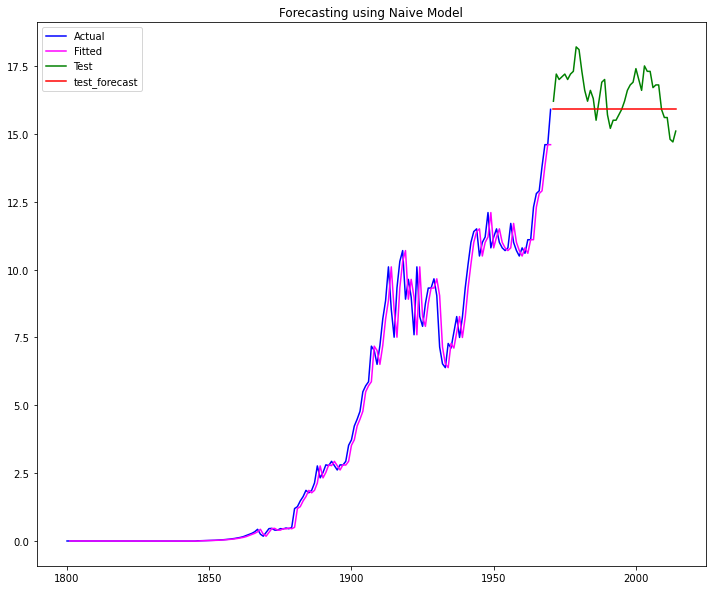

In [13]:
plt.figure(figsize=(12,10))
plt.plot(train, color= "blue", label= "Actual")
plt.plot(train.CO2.shift(1),color= "magenta", label= "Fitted")
plt.plot(test.CO2, color= "green", label= "Test")
plt.plot(y_hat_naive.Forecast,color= "red", label= "test_forecast")
plt.title("Forecasting using Naive Model")
plt.legend()
plt.show()

In [14]:
rmse_naive = np.sqrt(mean_squared_error(y_hat_naive.CO2 , y_hat_naive.Forecast))
mape_naive = mean_absolute_percentage_error(y_hat_naive.CO2 , y_hat_naive.Forecast)*100
print(rmse_naive)
print(mape_naive)

1.0246950765959597
5.217266582246844


# FBProphet

In [15]:
from fbprophet import Prophet
data_fbp  = df.copy()
data_fbp.columns= ["ds", "y"]
data_fbp.head()

,ds,y
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [16]:
train_fbp = data_fbp.iloc[0:171, :]
test_fbp = data_fbp.iloc[171:, :]

In [17]:
model_prophet = Prophet(growth="linear", weekly_seasonality=False, 
                        daily_seasonality=False, yearly_seasonality=False)
model_prophet.fit(train_fbp)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [18]:
fbp_forecast = model_prophet.predict(test_fbp)
fbp_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1971-01-01,13.473926,12.221976,14.848514,13.473926,13.473926,0.0,0.0,0.0,0.0,0.0,0.0,13.473926
1,1972-01-01,13.591564,12.403148,14.853003,13.589714,13.593082,0.0,0.0,0.0,0.0,0.0,0.0,13.591564
2,1973-01-01,13.709525,12.454193,14.927441,13.703506,13.716184,0.0,0.0,0.0,0.0,0.0,0.0,13.709525
3,1974-01-01,13.827163,12.542846,15.167913,13.815769,13.840017,0.0,0.0,0.0,0.0,0.0,0.0,13.827163
4,1975-01-01,13.944801,12.725526,15.208241,13.926114,13.965232,0.0,0.0,0.0,0.0,0.0,0.0,13.944801


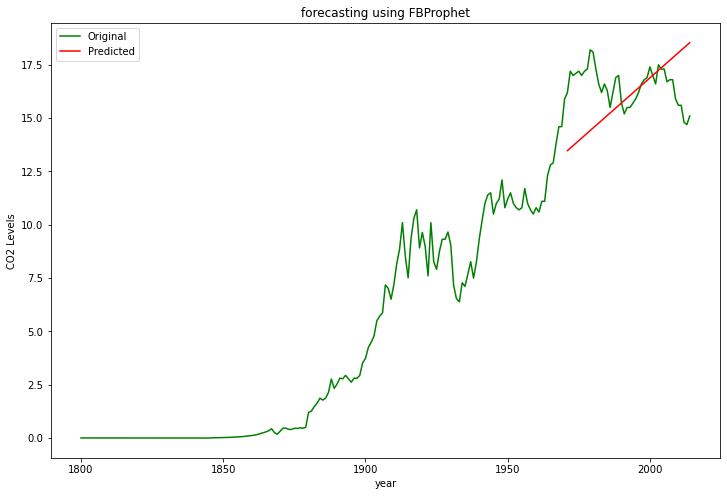

In [19]:
# plotting the original data and predicted data for visulaization 
plt.figure(figsize=(12,8))
plt.plot(data_fbp.ds, data_fbp.y, color='green', label='Original')
plt.plot(test_fbp.ds, fbp_forecast.yhat, color='Red', label='Predicted')
plt.title("forecasting using FBProphet")
plt.xlabel("year")
plt.ylabel("CO2 Levels")
plt.legend()
plt.show()

In [20]:
rmse_fbp = np.sqrt(mean_squared_error(test_fbp.y , fbp_forecast.yhat))
mape_fbp = mean_absolute_percentage_error(test_fbp.y  , fbp_forecast.yhat)*100
print(rmse_fbp)
print(mape_fbp)

2.060160113674757
9.665341590961066


# Simple Moving Average

In [21]:
data_sma = train.copy()
data_sma

,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542
...,...
1966,12.90000
1967,13.80000
1968,14.60000


In [22]:
sma = data_sma.CO2.rolling(window=3).mean()

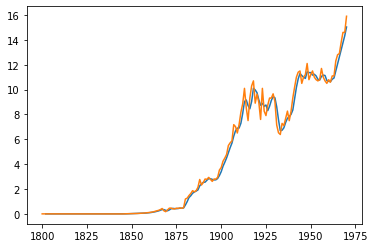

In [23]:
plt.plot(sma.dropna())
plt.plot(train)

In [24]:
lis = list(train.iloc[168:171,0].values)
forecast_sma = []
lis

[14.6, 14.6, 15.9]

In [25]:
# for forecasting, lets take last 3 data points and lets predict for 44 years

lis = list(train.iloc[168:171,0].values)
forecast_sma = []

for i in range(44): 
    ma = np.round((pd.Series(lis[i:i+3]).sum())/3,2)
    forecast_sma .append(ma)
    lis.append(ma)

In [26]:
forecast_sma= pd.Series(forecast_sma).set_axis(range(1971,2015))

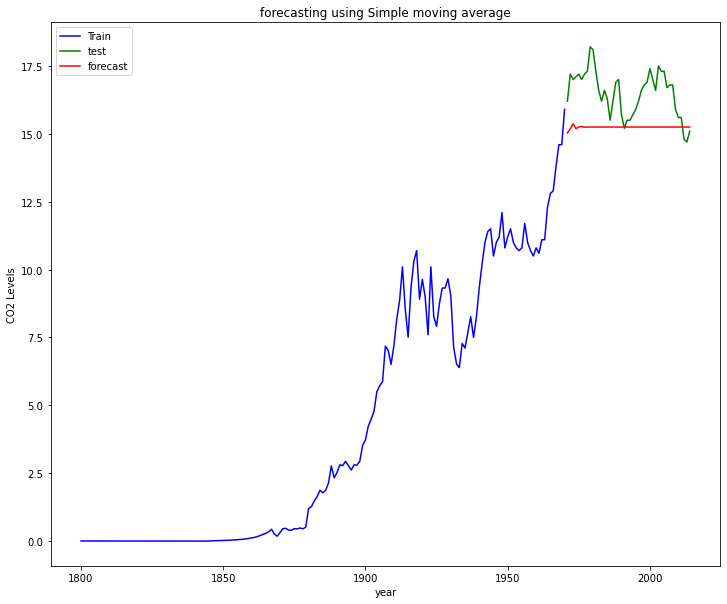

In [27]:
plt.figure(figsize=(12,10))
plt.plot(train.CO2, color="blue", label = "Train")
plt.plot(test.CO2, color= "Green", label = "test")
plt.plot(forecast_sma, color = "red", label= "forecast")
plt.title("forecasting using Simple moving average")
plt.xlabel("year")
plt.ylabel("CO2 Levels")
plt.legend()
plt.show()

In [28]:
rmse_sma= np.sqrt(mean_squared_error(test.CO2.values , forecast_sma))
mape_sma = mean_absolute_percentage_error(test.CO2.values  , forecast_sma)*100
print(rmse_sma)
print(mape_sma)

1.5068314136262588
7.763171693687269


# Stationarity 

In [29]:
df2 = df.copy()
df2.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [30]:
df2.set_index("Year", inplace= True)
df2.head()

,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542


In [31]:
# lets use the Augments Dickey Fuller test to check the Stationarity by using the function
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
    print('Results of Dickey Fuller Test:')
    result = adfuller(data, autolag='AIC')
    label=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, label):
        print(f"{label} :- {value}")

In [32]:
adfuller_test(df2) # from p value above we can see that series is not Stationary 

Results of Dickey Fuller Test:
Test Statistic :- -0.37846277515588705
p-value :- 0.9136330950336237
#Lags Used :- 0
Number of Observations Used :- 214


In [33]:
#Test whether Timeseries is Stationary or not
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

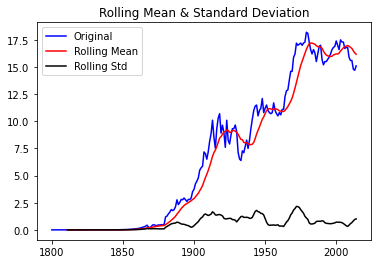

In [34]:
test_stationarity(df2)

In [35]:
# lets take first difference to make the data stationary
df2["first_diff"]= df2 - df2.shift(1)
df2.head()


,CO2,first_diff
Year,,
1800,0.00568,NaN
1801,0.00561,-0.00007
1802,0.00555,-0.00006
1803,0.00548,-0.00007
1804,0.00542,-0.00006


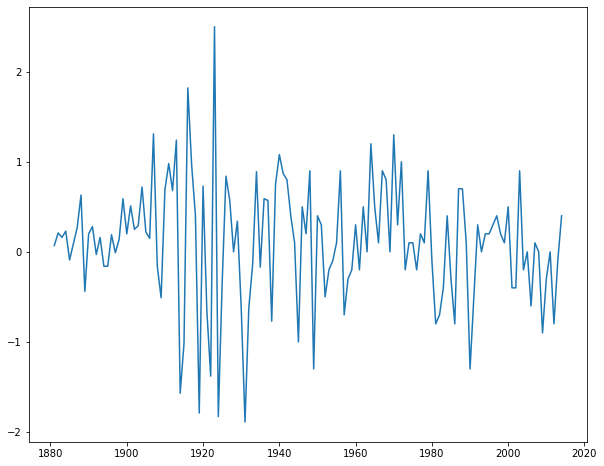

In [36]:
plt.figure(figsize=(10,8))
plt.plot(df2.first_diff.dropna().iloc[80:])

In [37]:
adfuller_test(df2.first_diff.dropna())

Results of Dickey Fuller Test:
Test Statistic :- -3.7800045305842516
p-value :- 0.003118649594242027
#Lags Used :- 15
Number of Observations Used :- 198


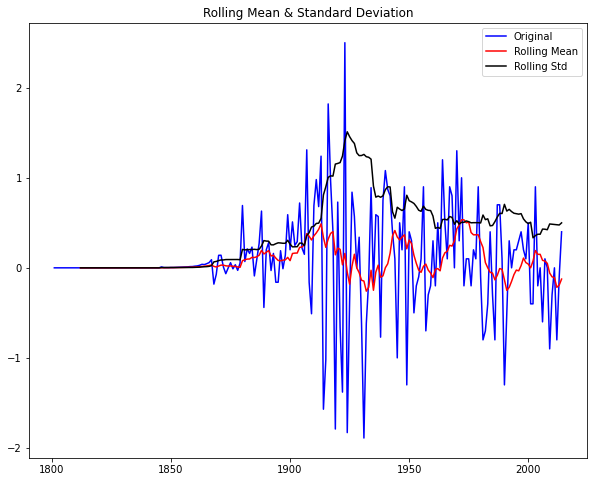

In [38]:
plt.figure(figsize=(10,8))
test_stationarity(df2.first_diff.dropna())

In [39]:
diff_data = list(df2.first_diff.dropna())
data =list(df2.CO2)

In [40]:
train_df= diff_data[: 170]
test_df = diff_data[170 :]

In [41]:
test = df2[171:]
test.head()

,CO2,first_diff
Year,,
1971,16.2,0.3
1972,17.2,1.0
1973,17.0,-0.2
1974,17.1,0.1
1975,17.2,0.1


# Auto-Regression

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

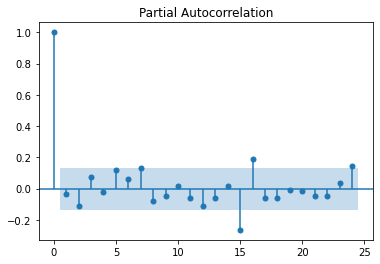

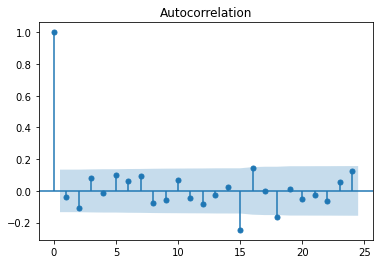

In [43]:
plot_pacf(df2.first_diff.dropna())
plot_acf(df2.first_diff.dropna())
plt.show()

In [44]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(train_df, trend="n", lags=15).fit()

C:\Users\STUDENT\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [45]:
pred_ar= model_ar.predict(start=171, end = 214)
pred_ar

array([ 0.19556535,  0.38560183,  0.27617346,  0.11797096,  0.13616999,
        0.02943915,  0.15217635, -0.21759714,  0.05298186,  0.09099908,
       -0.20114769, -0.12663936,  0.17619618, -0.4180615 ,  0.04493849,
        0.03749556, -0.15277753, -0.0744585 , -0.03744285, -0.04930992,
       -0.04745912, -0.05705401,  0.07307557, -0.08141635, -0.05536282,
        0.06666844,  0.01155535, -0.10747241,  0.13197953, -0.01535874,
       -0.05941955,  0.06195337,  0.01609916, -0.01076339,  0.01354258,
        0.02558626,  0.01396528, -0.04040925,  0.04467113,  0.02233701,
       -0.03335646,  0.00571893,  0.04679208, -0.04762347])

In [46]:
forecast_AR = [15.9]
for i in range(len(pred_ar)):
    summ= (forecast_AR[i]+pred_ar[i])
    forecast_AR.append(summ)

forecast_AR.remove(15.9)

In [47]:
forecast_AR= pd.Series(forecast_AR).set_axis(df2.index[171:])

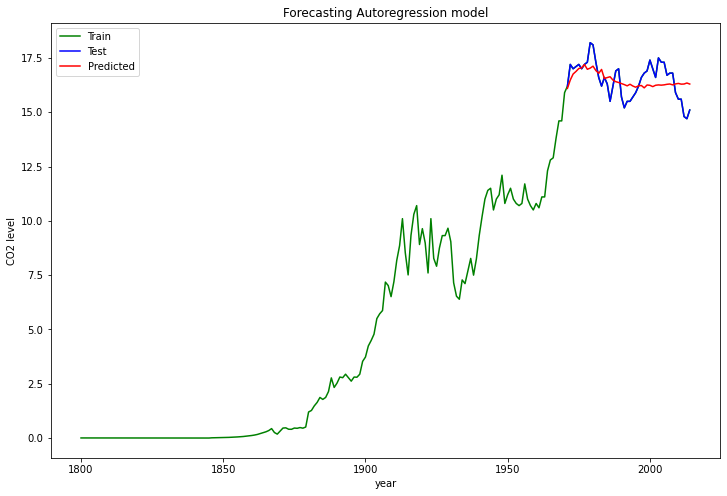

In [48]:
plt.figure(figsize=(12,8))
plt.plot(df2.CO2, color='green', label='Train')
plt.plot(test.CO2, color='blue', label='Test')
plt.plot(forecast_AR, color='Red', label='Predicted')
plt.title("Forecasting Autoregression model")
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [49]:
rmse_ar = np.sqrt(mean_squared_error(test.CO2 ,forecast_AR))
mape_Ar = mean_absolute_percentage_error(test.CO2 ,forecast_AR)*100
print(rmse_ar)
print(mape_Ar)

0.7406366529728764
3.788231245544355


In [50]:
model_ar.fittedvalues

array([-1.17090658e-05, -1.60839884e-05, -1.12171227e-05, -1.52607487e-05,
       -2.19568140e-05, -1.84526801e-05, -2.48799298e-05, -2.09019539e-05,
       -2.72037560e-05, -2.43244047e-05, -2.60900935e-05, -2.51347733e-05,
       -2.63792710e-05, -2.74419636e-05, -2.18406082e-05, -2.72401718e-05,
       -2.18717554e-05, -2.82557380e-05, -2.00035886e-05, -2.41977968e-05,
       -1.98710581e-05, -1.99574162e-05, -1.96996891e-05, -1.65668874e-05,
       -1.72502582e-05, -1.18749756e-05, -1.64668571e-05, -7.67565913e-06,
       -1.25940040e-05, -1.14263650e-05, -1.16672831e-05, -4.20900755e-04,
       -5.85524706e-04,  8.42555744e-04, -2.90863909e-04,  1.84595706e-03,
        2.21371100e-03,  2.06287311e-03, -1.93906696e-05,  4.49478907e-04,
        1.83728918e-03,  1.19711153e-03,  1.09094955e-03,  1.82360670e-03,
        3.81046612e-03,  4.89570344e-04,  2.40034750e-03,  3.41033645e-03,
        3.76114803e-03,  4.54198866e-03,  6.27759848e-03,  6.56298139e-03,
        9.08508356e-03,  

In [51]:
len(train_df[14:])

156

In [52]:
rmse_ar = np.sqrt(mean_squared_error(train_df[15:] ,model_ar.fittedvalues))
rmse_ar

0.5324618095685617

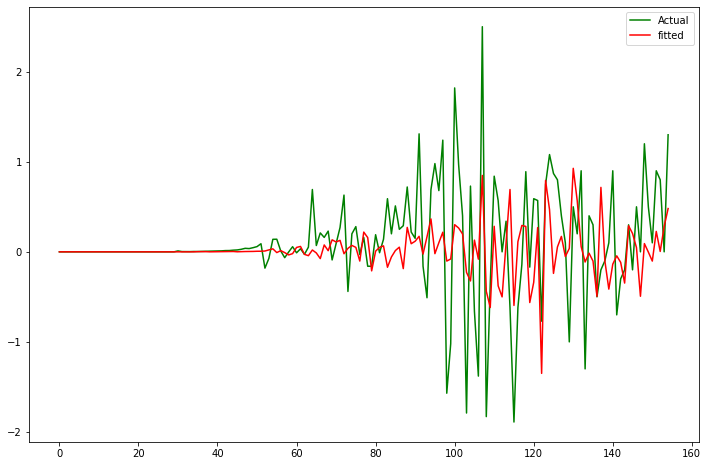

In [53]:
plt.figure(figsize=(12,8))
plt.plot(train_df[15:], color = "green", label = "Actual")
plt.plot(model_ar.fittedvalues, color = "red", label = "fitted")
plt.legend()

# Simple Exponential smoothing

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [55]:
# Using Simple Exponential Smoothing
model_se = SimpleExpSmoothing(train_df).fit(optimized=True)

C:\Users\STUDENT\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [56]:
forecast_se = model_se.forecast(44)
forecast_se

array([0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599])

In [57]:
act= [15.9]
for i in range(len(forecast_se)):
    summ= (act[i]+forecast_se[i])
    act.append(summ)
act.remove(15.9)

In [58]:
act_pred= pd.Series(act).set_axis(df2.index[171:])
act_pred.head()

Year
1971    15.993496
1972    16.086992
1973    16.180488
1974    16.273984
1975    16.367480
dtype: float64

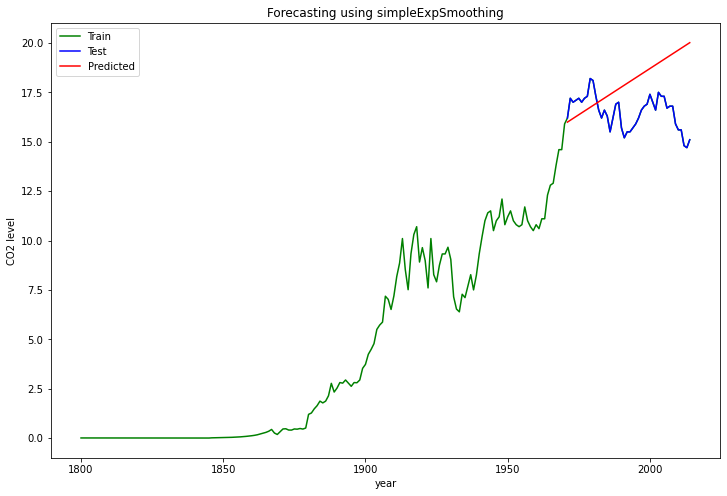

In [59]:
plt.figure(figsize=(12,8))
plt.plot(df2.CO2, color='green', label='Train')
plt.plot(test.CO2, color='blue', label='Test')
plt.plot(act_pred, color='Red', label='Predicted')
plt.title("Forecasting using simpleExpSmoothing")
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [60]:
rmse_se = np.sqrt(mean_squared_error(test.CO2,act_pred))
mape_se = mean_absolute_percentage_error(test.CO2,act_pred)*100

print(rmse_se)
print(mape_se)

2.2793966631159766
11.802031153391876


# Using Holt Winter's Exponential Smoothing

In [61]:
model_hw= ExponentialSmoothing(train_df, 
                              initialization_method="heuristic", use_boxcox=False).fit()

In [62]:
forecast_hw= model_hw.forecast(44)
forecast_hw

array([0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599])

In [63]:
forecast_act = [15.9]
for i in range(len(forecast_hw)):
    summ= (forecast_act[i]+forecast_hw[i])
    forecast_act.append(summ)

forecast_act.remove(15.9)

In [64]:
forecast_act= pd.Series(forecast_act).set_axis(df2.index[171:])

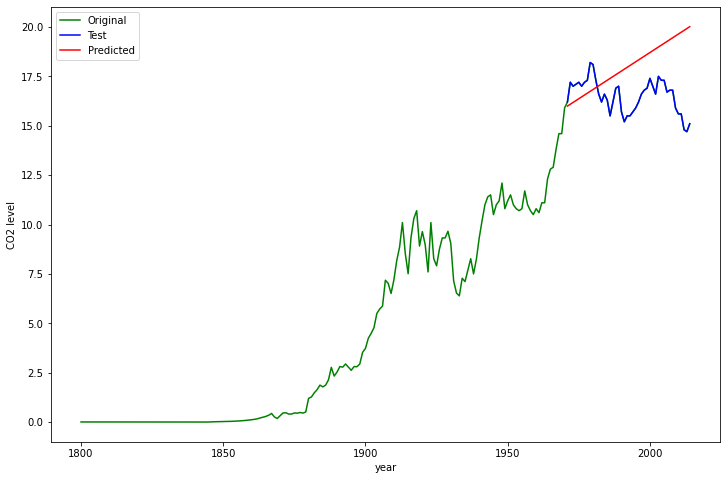

In [65]:
plt.figure(figsize=(12,8))
plt.plot(df2.CO2, color='green', label='Original')
plt.plot(test.CO2, color='blue', label='Test')
plt.plot(forecast_act, color='Red', label='Predicted')
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [66]:
rmse_hw = np.sqrt(mean_squared_error(test.CO2 ,forecast_act))
mape_hw = mean_absolute_percentage_error(test.CO2 ,forecast_act)*100
print(rmse_hw)
print(mape_hw)

2.2793966266021446
11.802030964375918


# ARIMA

In [67]:
df_ar = pd.read_excel("D:\pyt\Project CO2\CO2 dataset.xlsx", parse_dates=["Year"], index_col="Year")
df_ar.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [68]:
# Train test split 
train_arima = df_ar.iloc[0:171]  
test_arima= df_ar.iloc[171: ]
print(train.shape)
print(test.shape)

(171, 1)
(44, 2)


In [69]:
test_arima.tail()

,CO2
Year,
2010-01-01,15.6
2011-01-01,15.6
2012-01-01,14.8
2013-01-01,14.7
2014-01-01,15.1


In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [72]:
model_arima= ARIMA(train_arima, order = (10, 1, 15)).fit()

In [73]:
forecast_arima = model_arima.predict(start = 171, end = 214)

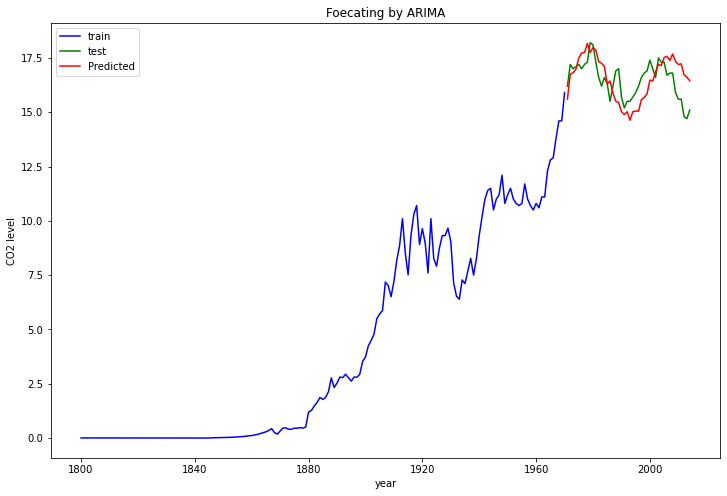

In [74]:
plt.figure(figsize=(12,8))
plt.plot(train_arima.CO2, color='blue', label='train')
plt.plot(test_arima.CO2, color='green', label='test')
plt.plot(forecast_arima, color='Red', label='Predicted')
plt.title("Foecating by ARIMA")
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [75]:
rmse_arima= np.sqrt(mean_squared_error(test_arima,forecast_arima))
mape_arima= mean_absolute_percentage_error(test_arima,forecast_arima)*100
print(rmse_arima)
print(mape_arima)

0.9183504138009073
4.799162205073102


In [76]:
train_arima

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
1966-01-01,12.90000
1967-01-01,13.80000
1968-01-01,14.60000


In [77]:
model_arima.fittedvalues

Year
1800-01-01     0.000000
1801-01-01     0.005680
1802-01-01     0.005614
1803-01-01     0.005554
1804-01-01     0.005475
                ...    
1966-01-01    12.749579
1967-01-01    13.059881
1968-01-01    14.327438
1969-01-01    14.759239
1970-01-01    15.402132
Length: 171, dtype: float64

In [78]:
rmse_arima0=np.sqrt(mean_squared_error(train_arima,model_arima.predict(start = 0, end = 170)))
rmse_arima0

0.45178305238683447

# Final Arima Model

In [79]:
df_ar

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


In [80]:
model_arima_final = ARIMA(df_ar, order = (10, 1, 15)).fit()

In [81]:
fitted = model_arima_final.predict(start = 0, end = 214)

In [82]:
fitted

1800-01-01     0.000000
1801-01-01     0.005680
1802-01-01     0.005611
1803-01-01     0.005557
1804-01-01     0.005480
                ...    
2010-01-01    15.624488
2011-01-01    15.173018
2012-01-01    15.569012
2013-01-01    14.599722
2014-01-01    14.344746
Freq: AS-JAN, Name: predicted_mean, Length: 215, dtype: float64

In [83]:
rmse_arima_fitted = np.sqrt(mean_squared_error(df_ar,fitted))
rmse_arima_fitted

0.4826334541476079

In [84]:
mape_arima_fitted = mean_absolute_percentage_error(df_ar,fitted)*100
mape_arima_fitted

7.6754244950592385

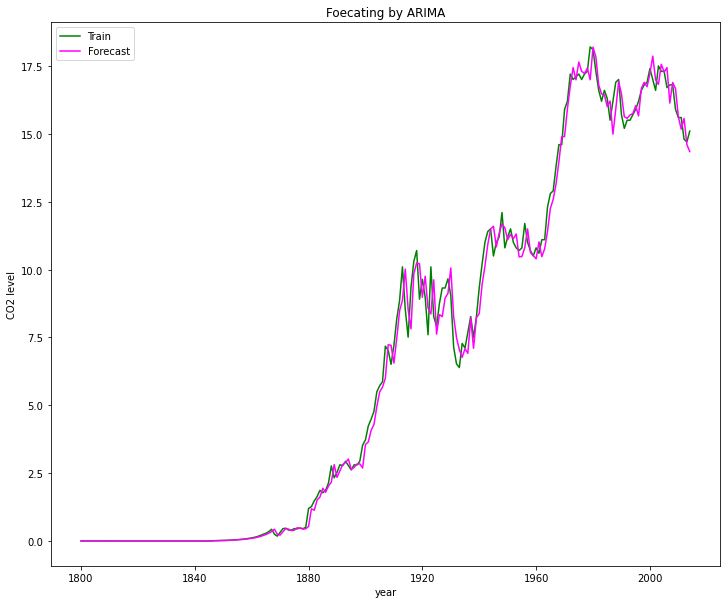

In [85]:
plt.figure(figsize=(12,10))
plt.plot(df_ar, color='green', label='Train')
plt.plot(fitted, color='magenta', label='Forecast')
plt.title("Foecating by ARIMA")
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [86]:
forecast_final = model_arima_final.predict(start=215, end = 265)
forecast_final.head()

2015-01-01    14.751138
2016-01-01    14.555887
2017-01-01    14.794083
2018-01-01    14.277049
2019-01-01    14.364119
Freq: AS-JAN, Name: predicted_mean, dtype: float64

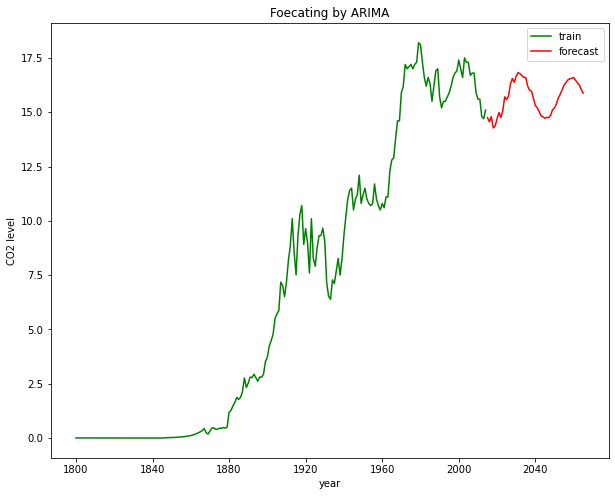

In [87]:
plt.figure(figsize=(10,8))
plt.plot(df_ar, color='green', label='train')
plt.plot(forecast_final, color='Red', label='forecast')
plt.title("Foecating by ARIMA")
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [90]:
import pickle
file = open("D:\pyt\Project CO2\CO2_Forecasting_ARIMA.pkl","wb")
pickle.dump(model_arima_final , file)

In [91]:
model = pickle.load(open("D:\pyt\Project CO2\CO2_Forecasting_ARIMA.pkl","rb"))

In [92]:
pred11= model.forecast(25)

In [108]:
pred11

2015-01-01    14.751138
2016-01-01    14.555887
2017-01-01    14.794083
2018-01-01    14.277049
2019-01-01    14.364119
2020-01-01    14.703649
2021-01-01    14.985725
2022-01-01    14.758493
2023-01-01    15.075645
2024-01-01    15.709281
2025-01-01    15.580318
2026-01-01    15.749506
2027-01-01    16.305188
2028-01-01    16.555171
2029-01-01    16.377805
2030-01-01    16.664204
2031-01-01    16.825904
2032-01-01    16.766601
2033-01-01    16.683099
2034-01-01    16.600411
2035-01-01    16.596392
2036-01-01    16.198601
2037-01-01    16.011217
2038-01-01    15.965498
2039-01-01    15.631579
Freq: AS-JAN, Name: predicted_mean, dtype: float64